In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

/Users/navrozlamba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# dataset from Kaggle
df = pd.read_csv('datasets_809_1494_Fleet Data.csv')
df.head(5)

Parent Airline          Airline Aircraft Type  Current  Future  Historic  \
0  Aegean Airlines  Aegean Airlines   Airbus A319      1.0     NaN       3.0   
1  Aegean Airlines      Olympic Air   Airbus A319      NaN     NaN       8.0   
2  Aegean Airlines  Aegean Airlines   Airbus A320     38.0     NaN       3.0   
3  Aegean Airlines      Olympic Air   Airbus A320      NaN     NaN       9.0   
4  Aegean Airlines  Aegean Airlines   Airbus A321      8.0     NaN       NaN   

   Total  Orders Unit Cost Total Cost (Current)  Average Age  
0    4.0     NaN       $90                  $90         11.6  
1    8.0     NaN       $90                   $0          NaN  
2   41.0     NaN       $98               $3,724          7.5  
3    9.0     NaN       $98                   $0          NaN  
4    8.0     NaN      $115                 $919         10.3

In [3]:
# Self generated data with information from Boeing and Airbus websites. 
self_df = pd.read_csv('delivery count.csv')
self_df.head(5)

Time  Boeing  Airbus
0  1974     234       4
1  1975     144       8
2  1976     221      13
3  1977     305      15
4  1978     552      15

Before starting with EDA lets clean the dataset from Kaggle

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parent Airline        1583 non-null   object 
 1   Airline               1583 non-null   object 
 2   Aircraft Type         1583 non-null   object 
 3   Current               859 non-null    float64
 4   Future                188 non-null    float64
 5   Historic              1113 non-null   float64
 6   Total                 1484 non-null   float64
 7   Orders                348 non-null    float64
 8   Unit Cost             1548 non-null   object 
 9   Total Cost (Current)  1556 non-null   object 
 10  Average Age           820 non-null    float64
dtypes: float64(6), object(5)
memory usage: 136.2+ KB


In [5]:
# Looking for Null Values 
df.isna().sum().sort_values(ascending= False)

Future                  1395
Orders                  1235
Average Age              763
Current                  724
Historic                 470
Total                     99
Unit Cost                 35
Total Cost (Current)      27
Aircraft Type              0
Airline                    0
Parent Airline             0
dtype: int64

Current, future, Historic, Total, Orders seems to have a lot of NaN values and we will consider them as 0.

We will fill the NaN in average_age with zeros as well

'$' and ',' needs to be removed form Unit and Total_cost

Future and orders are the same thing just from different sources, so we will take an avg and make a new column

We will also have to fix the total column so it accounts for the new future column.

In [6]:
# Filling NaN values with ZEROS
df[['Future', 'Orders', 'Average Age', 'Current', 'Historic', 'Total']] = df[['Future', 'Orders', 'Average Age', 
                                                                              'Current', 'Historic', 'Total']].fillna(0)

In [7]:
# All we get left with is Unit Cost and Total Cost 
df.isna().sum().sort_values(ascending= False)

Unit Cost               35
Total Cost (Current)    27
Average Age              0
Orders                   0
Total                    0
Historic                 0
Future                   0
Current                  0
Aircraft Type            0
Airline                  0
Parent Airline           0
dtype: int64

In [8]:
# Writing a function to fix the attributes Unit Cost and Total Cost 

def clean_values(val):
# converting input argument into a string 
    val = str(val)
    val = val.replace('$','').replace(',','')
# To skip NaN values     
    if val != 'nan' :
# Convert it back to int
        val = int(val)
    return val

In [9]:
# Applying the apply method and passing the above function 
df["Unit Cost"] = df["Unit Cost"].apply(clean_values)
df["Total Cost (Current)"] = df["Total Cost (Current)"].apply(clean_values)

In [10]:
# All the NaN values have been taken care off along with '$' and ',' in the values 
df.isna().sum()

Parent Airline          0
Airline                 0
Aircraft Type           0
Current                 0
Future                  0
Historic                0
Total                   0
Orders                  0
Unit Cost               0
Total Cost (Current)    0
Average Age             0
dtype: int64

In [11]:
# taking out the future attribute from the total so we could later add thevalues from new future_orders column
df['Total'] = df['Total'] - df['Future']
# taking an average of future and orders and assigning it to a new attribute
df['Future_Orders'] = (df['Future'] + df['Orders'])
#use floor for an estimate 
df['Future_Orders'] = df['Future_Orders'].apply(lambda x: math.floor(x/2))
# adding future_orders to the total
df['Total'] = df['Total'] + df['Future_Orders']

In [12]:
# dropping future ,orders and airline (redundant)
df = df.drop(['Future', 'Orders', 'Airline'], axis=1)

In [13]:
# changing the names of the columns to better represent the data and adding '_' for the spaces in the names
df = df.rename(columns={'Average Age':'Average_Age', 'Current':'Currently_Active', 'Historic':'Retired'
                   ,'Parent Airline':'Airline','Aircraft Type':'Aircraft_Type', 
                   'Total Cost (Current)':'Total_Current_Cost', 'Unit Cost':'Unit_Cost'})

In [14]:
# Changing the order of the columns 
df = df.reindex(columns= ['Airline', 'Aircraft_Type','Retired','Currently_Active','Future_Orders', 
                          'Total', 'Unit_Cost', 'Total_Current_Cost', 'Average_Age' ])
df.head()

Airline Aircraft_Type  Retired  Currently_Active  Future_Orders  \
0  Aegean Airlines   Airbus A319      3.0               1.0              0   
1  Aegean Airlines   Airbus A319      8.0               0.0              0   
2  Aegean Airlines   Airbus A320      3.0              38.0              0   
3  Aegean Airlines   Airbus A320      9.0               0.0              0   
4  Aegean Airlines   Airbus A321      0.0               8.0              0   

   Total Unit_Cost Total_Current_Cost  Average_Age  
0    4.0        90                 90         11.6  
1    8.0        90                  0          0.0  
2   41.0        98               3724          7.5  
3    9.0        98                  0          0.0  
4    8.0       115                919         10.3

In [15]:
# Changing the floats to integer 
df.dtypes

Airline                object
Aircraft_Type          object
Retired               float64
Currently_Active      float64
Future_Orders           int64
Total                 float64
Unit_Cost              object
Total_Current_Cost     object
Average_Age           float64
dtype: object

In [16]:
# converting Retired, Currently_Active, Total and Average_Age to integer 
df[['Retired', 'Currently_Active', 'Average_Age', 'Total']] = df[['Retired', 'Currently_Active', 'Average_Age', 'Total']].applymap(lambda x: int(x))
df[['Retired', 'Currently_Active', 'Average_Age', 'Total']].dtypes

Retired             int64
Currently_Active    int64
Average_Age         int64
Total               int64
dtype: object

In [17]:
# VAHLA! Ready for EDA
df.head()

Airline Aircraft_Type  Retired  Currently_Active  Future_Orders  \
0  Aegean Airlines   Airbus A319        3                 1              0   
1  Aegean Airlines   Airbus A319        8                 0              0   
2  Aegean Airlines   Airbus A320        3                38              0   
3  Aegean Airlines   Airbus A320        9                 0              0   
4  Aegean Airlines   Airbus A321        0                 8              0   

   Total Unit_Cost Total_Current_Cost  Average_Age  
0      4        90                 90           11  
1      8        90                  0            0  
2     41        98               3724            7  
3      9        98                  0            0  
4      8       115                919           10

# EDA 

In [18]:
# Since we are only comparing Boeing and Airbus we will filter those out from the dataset
filt = df['Aircraft_Type'].str.contains('Boeing') | df['Aircraft_Type'].str.contains('Airbus') | df['Aircraft_Type'].str.contains('McDonnell Douglas')
ba = df[filt]
ba.Aircraft_Type.value_counts()

Boeing 737                 147
Airbus A320                135
Airbus A330                 86
Boeing 767                  83
Airbus A321                 79
Airbus A319                 77
Boeing 747                  64
Boeing 757                  55
Boeing 777                  54
Airbus A300                 42
Airbus A340                 39
McDonnell Douglas DC-8      38
Boeing 787 Dreamliner       37
McDonnell Douglas DC-10     34
Airbus A310                 32
McDonnell Douglas MD-80     31
McDonnell Douglas MD-11     31
McDonnell Douglas DC-9      24
Airbus A350 XWB             18
Airbus A380                 14
Boeing 787                  13
Airbus A350                 13
Boeing 727                  12
McDonnell Douglas MD-90     12
Boeing 717                   6
Airbus A318                  5
Airbus A350-900              1
Airbus A320-200              1
Airbus A321neo               1
Boeing 737-800               1
Boeing 777-300               1
Name: Aircraft_Type, dtype: int64

In [19]:
# Looking at the value counts we can see that some models have been split into sub models which will effect our total count.
# Changing and adding the sub models under the parent model 

ba.loc[:,'Aircraft_Type'] = ba.loc[:,'Aircraft_Type'].replace({
    'Airbus A350 XWB': 'Airbus A350',
    'Airbus A321neo': 'Airbus A321',
    'Airbus A320-200': 'Airbus A320',
    'Boeing 777-300': 'Boeing 777',
    'Boeing 737-800': 'Boeing 737',
    'Airbus A350-900': 'Airbus A350',
    'Boeing 787 Dreamliner': 'Boeing 787'
})

ba['Aircraft_Type'].value_counts()

/Users/navrozlamba/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Boeing 737                 148
Airbus A320                136
Airbus A330                 86
Boeing 767                  83
Airbus A321                 80
Airbus A319                 77
Boeing 747                  64
Boeing 757                  55
Boeing 777                  55
Boeing 787                  50
Airbus A300                 42
Airbus A340                 39
McDonnell Douglas DC-8      38
McDonnell Douglas DC-10     34
Airbus A310                 32
Airbus A350                 32
McDonnell Douglas MD-80     31
McDonnell Douglas MD-11     31
McDonnell Douglas DC-9      24
Airbus A380                 14
Boeing 727                  12
McDonnell Douglas MD-90     12
Boeing 717                   6
Airbus A318                  5
Name: Aircraft_Type, dtype: int64

In [20]:
# Top 10 Aircrafts in the past 
popular_10 = ba.groupby('Aircraft_Type')[['Retired']].sum().sort_values(by='Retired', ascending=False).head(10).reset_index()
popular_10.head(10)

Aircraft_Type  Retired
0               Boeing 737     3873
1               Boeing 747     1479
2  McDonnell Douglas MD-80     1011
3              Airbus A320      928
4               Boeing 767      746
5   McDonnell Douglas DC-9      717
6   McDonnell Douglas DC-8      704
7               Boeing 757      677
8              Airbus A300      457
9  McDonnell Douglas DC-10      433

In [82]:
fig = plt.figure(figsize=(8,4), facecolor = '#dadada', dpi = 1000)
# Width of the vertical bars
# width = .4

y_indexes = np.arange(len(popular_10['Aircraft_Type']))
# kind 
sns.barplot(popular_10['Retired'], y_indexes, color = '#161616', orient='horizontal', palette="Blues_r")

# Setting up labels at x and y axis 
plt.yticks(ticks= y_indexes, labels=popular_10['Aircraft_Type'].values, fontsize = 13, color='#161616', alpha=0.7 )
plt.xticks(fontsize = 13, color='#161616', alpha=0.7 )
plt.xlabel('Total Aircraft', fontsize = 13,  alpha=0.7)
# plt.ylabel(fontsize = 13,  alpha=0.7)

plt.title('Top 10 Aircraft in the Past', fontsize = 16, fontweight = 'bold', color = '#161616' )

# To remove the spines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.tight_layout() # Makes it better looking specially on laptops

# Saving the plot as jpg
fig.savefig('top10aircrafts.png',bbox_inches='tight', dpi=1000, facecolor = '#dadada')

plt.show()

Plotting Time Series plot with self generated dataset. SOURCE: Boeing, Airbus 

In [38]:
fig = plt.figure(figsize=(8, 4), facecolor= '#dadada', dpi=1200)

x_index = np.arange(len(self_df['Time']))

plt.plot(x_index ,self_df['Boeing'], color="#000080", label='Boeing')
plt.plot(x_index ,self_df['Airbus'], color="#1464F4", label='Airbus')
# plt.plo\euler('Year', 'Airbus', data=self_df, color='tab:red')

# To set the ticks on the x axis and y axis
plt.xticks(ticks=x_index[::5], labels=self_df['Time'].values[::5], fontsize = 13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, alpha=.7, color= '#161616')

plt.ylabel('Total Aircrafts', fontsize=13, alpha=.7, color= '#161616')
plt.ylim(0, 1600)

plt.title("Aircraft Orders/Deliveries (1974 - 2020)", fontsize=16, fontweight='bold', color= '#161616' )
# '#191970'
# plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left', fontsize=13)

# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.tight_layout() # Makes it better looking specially on laptops

# to save the fig
fig.savefig('timeseriesplot.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')

plt.show()

Comparing Boeing and Airbus Geographically 

In [23]:
# Made 6 different lists of airlines under each continent. Surprisingly Antarctica didn't have many Airlines 

africa_airlines = ['Royal Air Maroc', 'South African Airways', 'EgyptAir', 'Air Namibia', 'Tunisair', 'Ethiopian Airlines', 'Air Algerie', 
          'Kenya Airways']

asia_airlines = ['Air India', 'China Airlines', 'AirAsia', 'FlyDubai', 'China Eastern Airlines', 'Vietnam Airlines', 'Qatar Airways', 
        'Philippine Airlines', 'Royal Jordanian', 'Air China', 'Pakistan International Airlines', 'Oman Air', 'Japan Airlines',
       'Saudi Arabian Airlines', 'Jet Airways', 'IndiGo', 'Etihad Airways', 'Malaysia Airlines', 'Emirates', 'Korean Air', 
       'Thai Airways', 'China Southern Airlines', 'Singapore Airlines', 'SpiceJet', 'All Nippon Airways', 'EVA Air', 'Air Mauritius',
       'Spring Airlines', 'Skymark Airlines', 'Tianjin Airlines', 'Gulf Air', 'Cathay Pacific', 'Cebu Pacific Air', 'Asiana Airlines', 
       'Air Astana', 'El Al', 'Air Arabia', 'Hainan Airlines', 'Garuda Indonesia', 'Juneyao Airlines', 'Lion Air']

australia_airlines = ['Virgin Australia', 'Air New Zealand', 'Qantas Airways']

europe_airlines = ['easyJet', 'Ryanair', 'Wizz Air', 'Aeroflot', 'Air France/KLM', 'Lufthansa', 'LOT Polish Airlines', 'TAP Portugal', 'Turkish Airlines',
         'Air Europa','Air Berlin', 'Air Malta', 'SAS Group', 'Norwegian Air', 'TUI Group', 'SunExpress', 'Utair', 'Finnair', 'Iceland Air Group',
         'S7 Airlines', 'Pegasus Airlines', 'Virgin Atlantic Airways', 'Thomas Cook Airlines', 'Aegean Airlines', 'IAG', 'Alitalia', 'Flybe', 
         'Meridiana', 'Monarch Airlines', 'Jet2'] 

north_america_airlines = ['WestJet', 'Volaris', 'Air Canada', 'American Airlines', 'Interjet', 'JetBlue', 'Hawaiian Airlines', 'FedEx Express', 
                 'Allegiant Air', 'Virgin America', 'United Airlines', 'UPS Airlines', 'Spirit Airlines', 'Southwest Airlines', 'Grupo Aeromexico',
                'Delta Airlines', 'Alaska Airlines', 'Air Transport International', 'Air Transport Services', 'Atlas Air', 'Air Transat',
                'Frontier Airlines']

south_america_airlines = ['LATAM Airlines Chile', 'Avianca', 'Aerolineas Argentinas', 'Copa Airlines', 'Gol Linhas Aéreas', 'Azul']

In [24]:
# making a dataset for each continent by filtering with the lists i created above. 

filt1 = ba['Airline'].isin(africa_airlines)
africa = ba[filt1]

filt2 = ba['Airline'].isin(asia_airlines)
asia = ba[filt2]

filt3 = ba['Airline'].isin(australia_airlines)
australia = ba[filt3]

filt4 = ba['Airline'].isin(europe_airlines)
europe = ba[filt4]

filt5 = ba['Airline'].isin(north_america_airlines)
north_america = ba[filt5]

filt6 = ba['Airline'].isin(south_america_airlines)
south_america = ba[filt6]

# display work 
north_america.head()

Airline Aircraft_Type  Retired  Currently_Active  Future_Orders  \
98   Air Canada   Airbus A319       33                15              0   
99   Air Canada   Airbus A319        2                 3              0   
100  Air Canada   Airbus A319        0                20              0   
101  Air Canada   Airbus A320       13                42              0   
102  Air Canada   Airbus A320        5                 0              0   

     Total Unit_Cost Total_Current_Cost  Average_Age  
98      48        90               1344           18  
99       5        90                269           18  
100     20        90               1792           18  
101     55        98               4116           23  
102      5       nan                  0            0

In [25]:
# using groupby method for all continents to sort out the data

africa = africa.groupby(["Aircraft_Type"], as_index=False)["Retired",
                                                           "Currently_Active", "Future_Orders"].sum().sort_values(by=["Currently_Active"], ascending=False)

asia = asia.groupby(["Aircraft_Type"], as_index=False)["Retired",
                                                       "Currently_Active", "Future_Orders"].sum().sort_values(by=["Currently_Active"], ascending=False)

europe = europe.groupby(["Aircraft_Type"], as_index=False)["Retired",
                                                           "Currently_Active", "Future_Orders"].sum().sort_values(by=["Currently_Active"], ascending=False)

north_america = north_america.groupby(["Aircraft_Type"], as_index=False)["Retired",
                                                                         "Currently_Active", "Future_Orders"].sum().sort_values(by=["Currently_Active"], ascending=False)

south_america = south_america.groupby(["Aircraft_Type"], as_index=False)["Retired",
                                                                         "Currently_Active", "Future_Orders"].sum().sort_values(by=["Currently_Active"], ascending=False)

australia = australia.groupby(["Aircraft_Type"], as_index=False)["Retired",
                                                                 "Currently_Active", "Future_Orders"].sum().sort_values(by=["Currently_Active"], ascending=False)

#display work
asia.head()

/Users/navrozlamba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/navrozlamba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/navrozlamba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
/Users/navrozlamba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':
/Users/navrozlamb

Aircraft_Type  Retired  Currently_Active  Future_Orders
10    Boeing 737     1024              1742            394
3    Airbus A320      330              1321            721
14    Boeing 777      120               798            178
5    Airbus A330      200               580             87
4    Airbus A321       72               465            188

In [26]:
# Filtering for Boeing and Airbus in the Aircraft_type attribute for each individual continent 

filt1 = africa["Aircraft_Type"].str.contains("Boeing") | africa["Aircraft_Type"].str.contains("McDonnel")
boeing_africa = africa[filt1.values]

filt7 = africa["Aircraft_Type"].str.contains("Airbus") 
airbus_africa = africa[filt7.values]

filt2 = asia["Aircraft_Type"].str.contains("Airbus")
airbus_asia = asia[filt2.values]

filt8 = asia["Aircraft_Type"].str.contains("Boeing") | asia["Aircraft_Type"].str.contains("McDonnel")
boeing_asia = asia[filt8.values]

filt9 = europe["Aircraft_Type"].str.contains("Airbus")
airbus_europe = europe[filt9.values]

filt3 = europe["Aircraft_Type"].str.contains("Boeing") | europe["Aircraft_Type"].str.contains("McDonnel")
boeing_europe = europe[filt3.values]

filt4 = north_america["Aircraft_Type"].str.contains("Airbus")
airbus_north_america = north_america[filt4.values]

filt10 = north_america["Aircraft_Type"].str.contains("Boeing") | north_america["Aircraft_Type"].str.contains("McDonnel")
boeing_north_america = north_america[filt10.values]

filt11 = south_america["Aircraft_Type"].str.contains("Airbus")
airbus_south_america = south_america[filt11.values]

filt5 = south_america["Aircraft_Type"].str.contains("Boeing") | south_america["Aircraft_Type"].str.contains("McDonnel")
boeing_south_america = south_america[filt5.values]
#boeing.head()
filt12 = australia["Aircraft_Type"].str.contains("Boeing") | australia["Aircraft_Type"].str.contains("McDonnel")
boeing_australia = australia[filt12.values]

filt6 = australia["Aircraft_Type"].str.contains("Airbus")
airbus_australia = australia[filt6.values]

# display work 
boeing_asia.head(9)

Aircraft_Type  Retired  Currently_Active  Future_Orders
10               Boeing 737     1024              1742            394
14               Boeing 777      120               798            178
15               Boeing 787        0               214            184
11               Boeing 747      784               183              5
13               Boeing 767      218               115              0
12               Boeing 757       93                16              0
9                Boeing 727        1                 0              0
16  McDonnell Douglas DC-10      101                 0              0
17   McDonnell Douglas DC-8      162                 0              0

In [27]:
# Since this dataset only accounts for future orders until 2016, I am adding the future orders for each individual year up until 2020. 

In [28]:
# Making a dataframe for africa with past, present and future as the columns to be able to plot the graph
africa_df = pd.DataFrame({"Model": ['Boeing', 'Airbus'],
                          "Past": [boeing_africa["Retired"].sum(),
                                      airbus_africa["Retired"].sum()],
                          "Present": [boeing_africa["Currently_Active"].sum(),
                                      airbus_africa["Currently_Active"].sum()],
                          "Future": [boeing_africa["Future_Orders"].sum(),
                                     airbus_africa["Future_Orders"].sum()]})

# Making a dataframe for asia to be able to plot the graph
asia_df = pd.DataFrame({"Model": ['Boeing', 'Airbus'],
                          "Past": [boeing_asia["Retired"].sum(),
                                      airbus_asia["Retired"].sum()],
                          "Present": [boeing_asia["Currently_Active"].sum(),
                                      airbus_asia["Currently_Active"].sum()],
                          "Future": [boeing_asia["Future_Orders"].sum(),
                                     airbus_asia["Future_Orders"].sum()]})

# Making a dataframe for europe to be able to plot the graph
europe_df = pd.DataFrame({"Model": ['Boeing', 'Airbus'],
                          "Past": [boeing_europe["Retired"].sum(),
                                      airbus_europe["Retired"].sum()],
                          "Present": [boeing_europe["Currently_Active"].sum(),
                                      airbus_europe["Currently_Active"].sum()],
                          "Future": [boeing_europe["Future_Orders"].sum(),
                                     airbus_europe["Future_Orders"].sum()]})

# Making a dataframe for australia to be able to plot the graph
australia_df = pd.DataFrame({"Model": ['Boeing', 'Airbus'],
                          "Past": [boeing_australia["Retired"].sum(),
                                      airbus_australia["Retired"].sum()],
                          "Present": [boeing_australia["Currently_Active"].sum(),
                                      airbus_australia["Currently_Active"].sum()],
                          "Future": [boeing_australia["Future_Orders"].sum(),
                                     airbus_australia["Future_Orders"].sum()]})

# Making a dataframe for north_america to be able to plot the graph
north_america_df = pd.DataFrame({"Model": ['Boeing', 'Airbus'],
                          "Past": [boeing_north_america["Retired"].sum(),
                                      airbus_north_america["Retired"].sum()],
                          "Present": [boeing_north_america["Currently_Active"].sum(),
                                      airbus_north_america["Currently_Active"].sum()],
                          "Future": [boeing_north_america["Future_Orders"].sum(),
                                     airbus_north_america["Future_Orders"].sum()]})

# Making a dataframe for africa to be able to plot the graph
south_america_df = pd.DataFrame({"Model": ['Boeing', 'Airbus'],
                          "Past": [boeing_south_america["Retired"].sum(),
                                      airbus_south_america["Retired"].sum()],
                          "Present": [boeing_south_america["Currently_Active"].sum(),
                                      airbus_south_america["Currently_Active"].sum()],
                          "Future": [boeing_south_america["Future_Orders"].sum(),
                                     airbus_south_america["Future_Orders"].sum()]})

# display work
asia_df.head()

Model  Past  Present  Future
0  Boeing  2852     3068     761
1  Airbus  1185     2789    1243

In [29]:
# Using melt to change the orientation of the dataframe of each individual continent to be able to plot using parameter (hue)

south_america_melt = pd.melt(south_america_df, id_vars="Model", var_name="Time", value_name="Orders")
north_america_melt = pd.melt(north_america_df, id_vars="Model", var_name="Time", value_name="Orders")
europe_melt = pd.melt(europe_df, id_vars="Model", var_name="Time", value_name="Orders")
asia_melt = pd.melt(asia_df, id_vars="Model", var_name="Time", value_name="Orders")
australia_melt = pd.melt(australia_df, id_vars="Model", var_name="Time", value_name="Orders")
africa_melt = pd.melt(africa_df, id_vars="Model", var_name="Time", value_name="Orders")

# display work
asia_melt.head(6)

Model     Time  Orders
0  Boeing     Past    2852
1  Airbus     Past    1185
2  Boeing  Present    3068
3  Airbus  Present    2789
4  Boeing   Future     761
5  Airbus   Future    1243

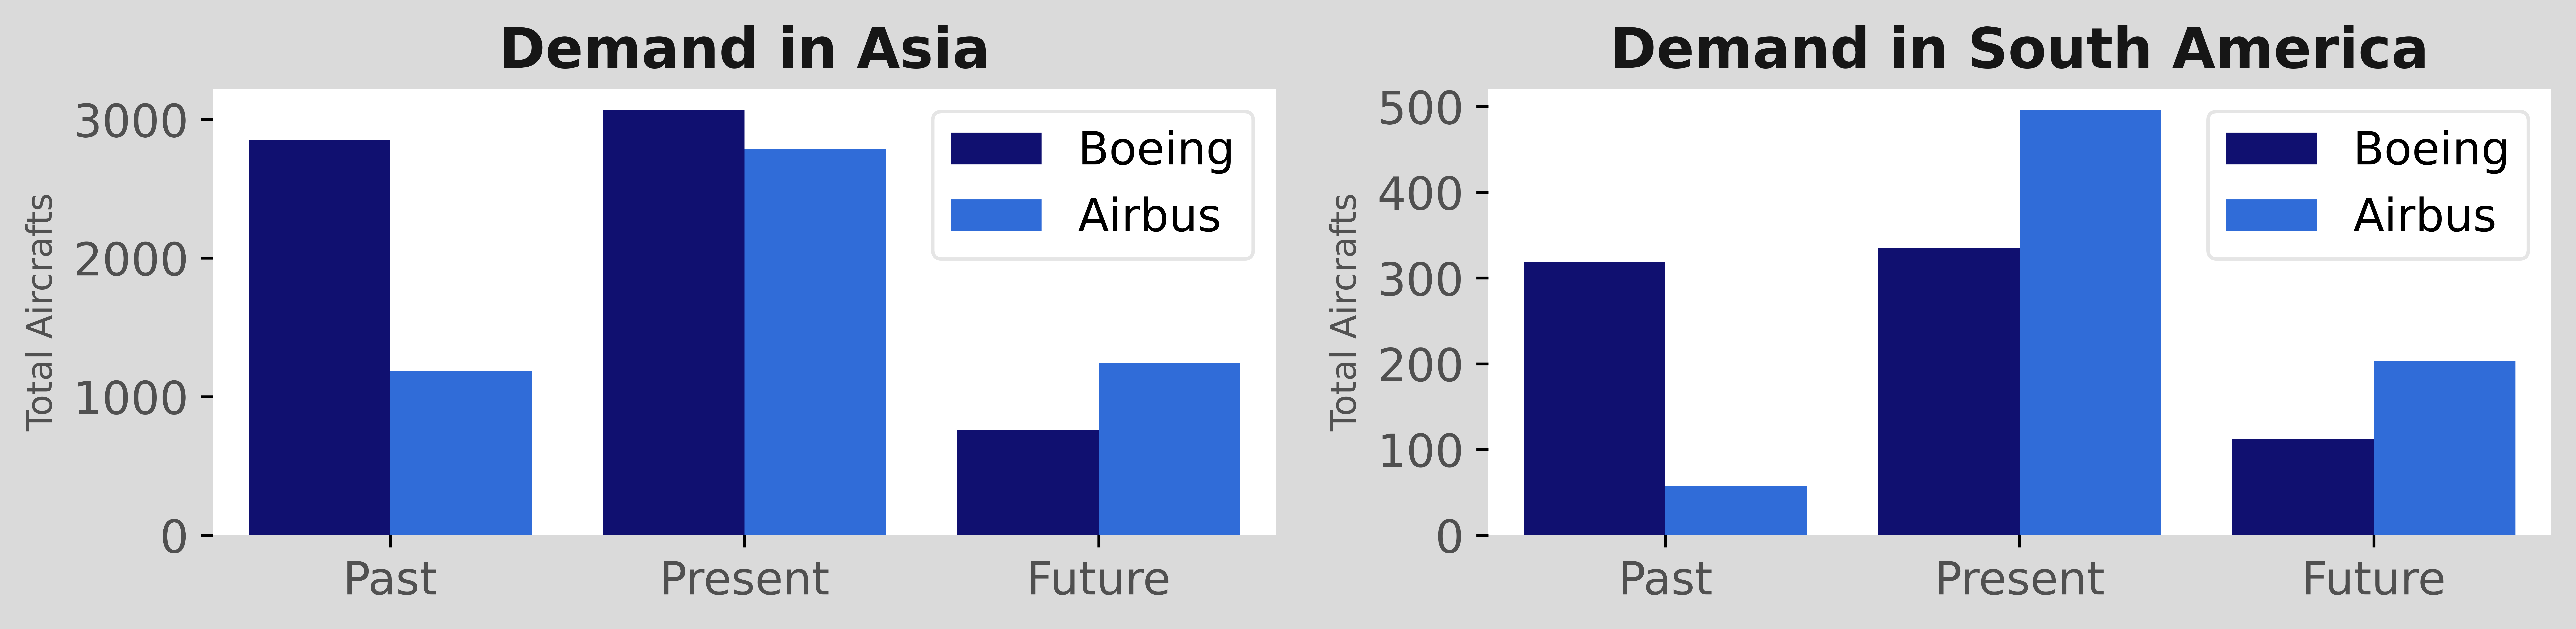

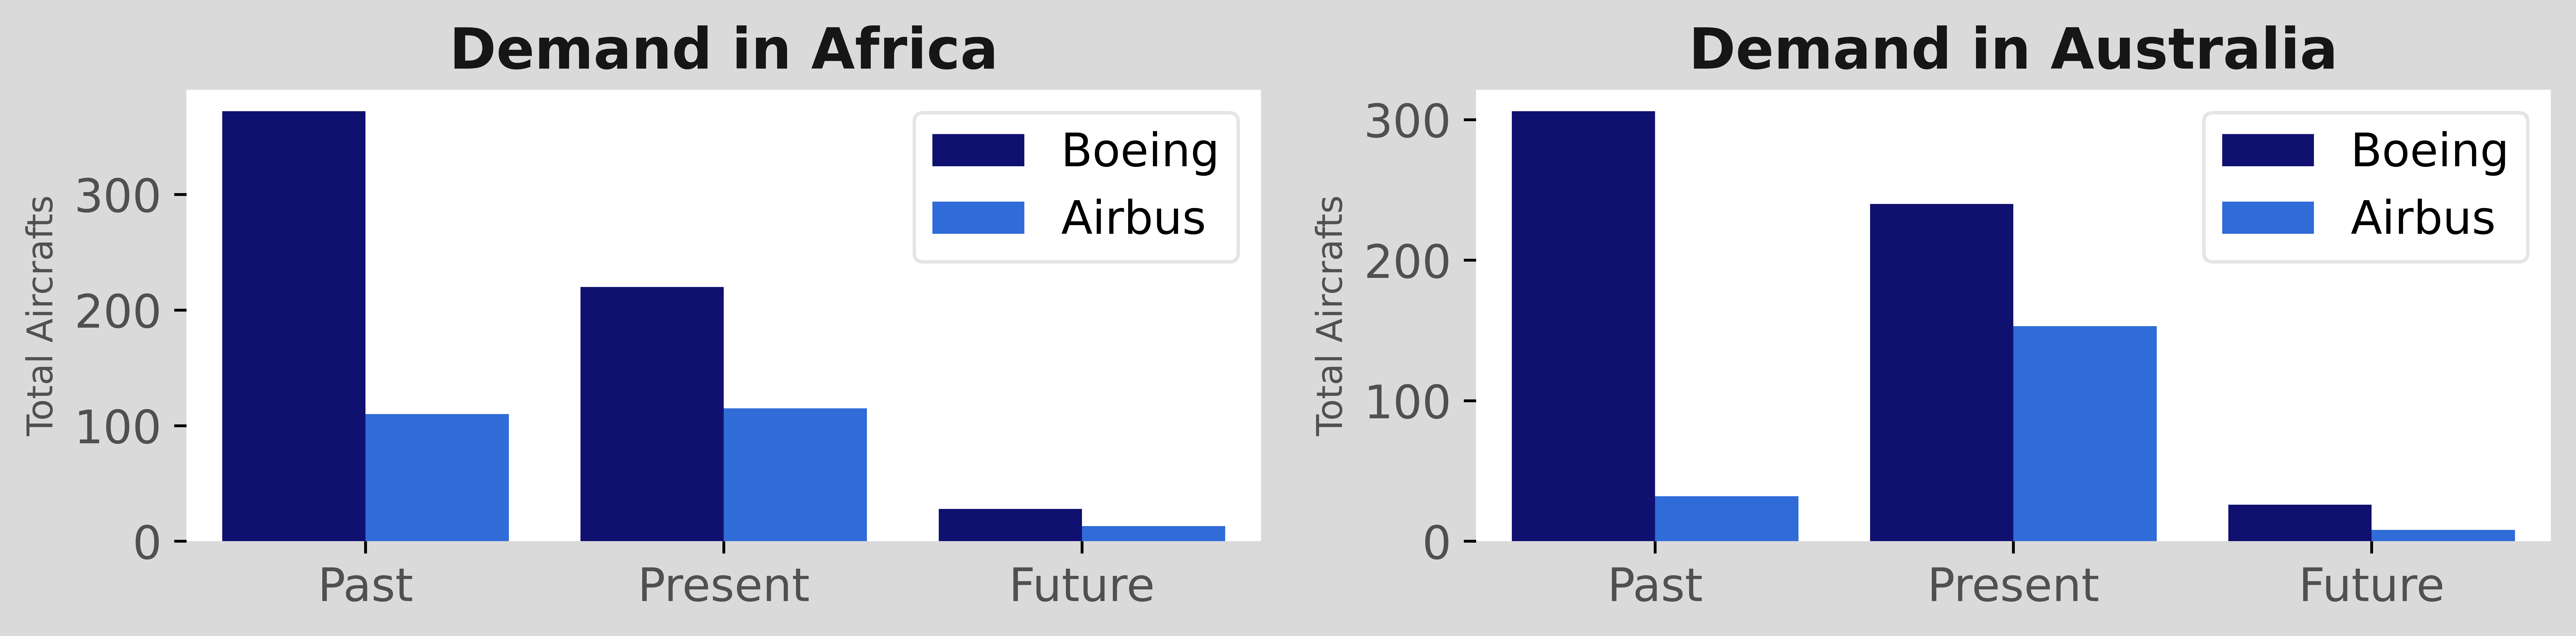

In [77]:


flatui = ["#000080", "#1464F4", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
# sns.palplot(sns.color_palette())

fig = plt.figure(figsize=(12, 8), facecolor='#dadada', dpi=1200)

# Using plt.subplot to be able to plot six different graphs together
# plot for North_America
plt.subplot(321)
# kind
sns.barplot(x="Time", y='Orders', hue='Model', data=north_america_melt)
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", color= '#161616', alpha=0.7)
# to remove x label
plt.xlabel('')
plt.legend(fontsize=13, fancybox=True, framealpha=0.5)
plt.title('Demand in North America', fontsize=16, fontweight='bold', color= '#161616')
# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# plot for Europe
plt.subplot(322)
sns.barplot(x="Time", y='Orders', hue='Model', data=europe_melt)
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", color= '#161616', alpha=0.7)
# to remove x label
plt.xlabel('')
plt.legend(fontsize=13, fancybox=True, framealpha=0.5)
plt.title('Demand in Europe', fontsize=16, fontweight='bold', color= '#161616')
# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# saving the pciture
fig.savefig('geographical demand1.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')



fig = plt.figure(figsize=(12, 8), facecolor='#dadada', dpi=1200)
plt.subplot(323)
sns.barplot(x="Time", y='Orders', hue='Model', data=asia_melt)
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", color= '#161616', alpha=0.7)
# to remove x label
plt.xlabel('')
plt.legend(fontsize=13, fancybox=True, framealpha=0.5)
plt.title('Demand in Asia', fontsize=16, fontweight='bold', color= '#161616')
# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)


plt.subplot(324)
sns.barplot(x="Time", y='Orders', hue='Model', data=south_america_melt)
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", color= '#161616', alpha=0.7)
# to remove x label
plt.xlabel('')
plt.legend(fontsize=13, fancybox=True, framealpha=0.5, loc='upper right')
plt.title('Demand in South America', fontsize=16, fontweight='bold', color= '#161616')
# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
# saving the 2nd pic
fig.savefig('geographical demand2.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')


fig = plt.figure(figsize=(12, 8), facecolor='#dadada', dpi=1200)
plt.subplot(325)
sns.barplot(x="Time", y='Orders', hue='Model', data=africa_melt)
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", color= '#161616', alpha=0.7)
# to remove x label
plt.xlabel('')
plt.legend(fontsize=13, fancybox=True, framealpha=0.5)
plt.title('Demand in Africa', fontsize=16, fontweight='bold', color= '#161616')
# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)


plt.subplot(326)
sns.barplot(x="Time", y='Orders', hue='Model', data=australia_melt)
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", color= '#161616', alpha=0.7)
# to remove x label
plt.xlabel('')
plt.legend(fontsize=13, fancybox=True, framealpha=0.5)
plt.title('Demand in Australia', fontsize=16, fontweight='bold', color= '#161616')
# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# Saving the 3rd fig
fig.savefig('geographical demand3.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')

plt.show()

Plotting the top models of Boeing and Airbus considering their count in the present and their future orders using pie chart 

In [31]:
# Filtering out Boeing and Airbus from the ba dataframe created above 
ba.head()

Airline Aircraft_Type  Retired  Currently_Active  Future_Orders  \
0  Aegean Airlines   Airbus A319        3                 1              0   
1  Aegean Airlines   Airbus A319        8                 0              0   
2  Aegean Airlines   Airbus A320        3                38              0   
3  Aegean Airlines   Airbus A320        9                 0              0   
4  Aegean Airlines   Airbus A321        0                 8              0   

   Total Unit_Cost Total_Current_Cost  Average_Age  
0      4        90                 90           11  
1      8        90                  0            0  
2     41        98               3724            7  
3      9        98                  0            0  
4      8       115                919           10

In [61]:
# making a dasaset for Boeing by filtering 
filt = ba.loc[:,'Aircraft_Type'].str.contains('Boeing')
# filt = df['Aircraft_Type'].str.contains('Airbus') 
boeing = ba.loc[filt]
boeing.head(25)

Airline Aircraft_Type  Retired  Currently_Active  \
7         Aegean Airlines    Boeing 737       17                 0   
22               Aeroflot    Boeing 737       16                20   
23               Aeroflot    Boeing 737        0                12   
24               Aeroflot    Boeing 737        5                17   
25               Aeroflot    Boeing 737        5                 0   
26               Aeroflot    Boeing 747        0                 7   
27               Aeroflot    Boeing 767       13                 0   
28               Aeroflot    Boeing 767        3                 0   
29               Aeroflot    Boeing 777        2                15   
30               Aeroflot    Boeing 777        1                 6   
31               Aeroflot    Boeing 787        0                 0   
52  Aerolineas Argentinas    Boeing 737       77                40   
53  Aerolineas Argentinas    Boeing 737        8                 0   
54  Aerolineas Argentinas    Boeing 747       17                 0   
55  Aerolineas Argentinas    Boeing 757        1                 0   
66            Air Algerie    Boeing 737       38                31   
67            Air Algerie    Boeing 747       14                 0   
68            Air Algerie    Boeing 767        7                 2   
69            Air Algerie    Boeing 777        2                 0   
70            Air Algerie    Boeing 787        0                 0   
80             Air Astana    Boeing 737        4                 0   
81             Air Astana    Boeing 757        0                 5   
82             Air Astana    Boeing 767        2                 3   
83             Air Astana    Boeing 787        0                 0   
91             Air Berlin    Boeing 737      141                14   

    Future_Orders  Total Unit_Cost Total_Current_Cost  Average_Age  
7               0     17        74                  0            0  
22             13     49        74               1480            1  
23              0     12        74                888            2  
24              0     22        74               1258            9  
25              0      5        74                  0            0  
26              2      9       316               2211           16  
27              0     13       187                  0            0  
28              0      3       187                  0            0  
29              0     17       295               4418            2  
30              5     12       295               1767           17  
31             11     11       265                  0            0  
52              0    117        74               2959            6  
53              0      8        74                  0            0  
54              0     17       316                  0            0  
55              0      1        73                  0            0  
66              1     70        74               2293            8  
67              0     14       316                  0            0  
68              0      9       187                374           26  
69              0      2       295                  0            0  
70              4      4       265                  0            0  
80              0      4        74                  0            0  
81              0      5        73                363           19  
82              0      5       187                561            3  
83              1      1       265                  0            0  
91              0    155        74               1036            9

In [62]:
# making a dasaset for Airbus by filtering 

filt = ba['Aircraft_Type'].str.contains('Airbus') 
airbus = ba[filt]
airbus.head(25)

Airline Aircraft_Type  Retired  Currently_Active  \
0         Aegean Airlines   Airbus A319        3                 1   
1         Aegean Airlines   Airbus A319        8                 0   
2         Aegean Airlines   Airbus A320        3                38   
3         Aegean Airlines   Airbus A320        9                 0   
4         Aegean Airlines   Airbus A321        0                 8   
10               Aeroflot   Airbus A310       14                 0   
11               Aeroflot   Airbus A319        5                26   
12               Aeroflot   Airbus A319       15                 0   
13               Aeroflot   Airbus A319        0                10   
14               Aeroflot   Airbus A320        3                71   
15               Aeroflot   Airbus A320        8                 5   
16               Aeroflot   Airbus A321        8                31   
17               Aeroflot   Airbus A330        0                22   
18               Aeroflot   Airbus A350        0                 0   
48  Aerolineas Argentinas   Airbus A310        5                 0   
49  Aerolineas Argentinas   Airbus A320        2                 0   
50  Aerolineas Argentinas   Airbus A330        0                 9   
51  Aerolineas Argentinas   Airbus A340        8                 5   
60            Air Algerie   Airbus A300        2                 0   
61            Air Algerie   Airbus A310        6                 0   
62            Air Algerie   Airbus A320        4                 0   
63            Air Algerie   Airbus A330        4                 8   
64            Air Algerie   Airbus A340        3                 0   
73             Air Arabia   Airbus A320       28                38   
74             Air Arabia   Airbus A320        2                 1   

    Future_Orders  Total Unit_Cost Total_Current_Cost  Average_Age  
0               0      4        90                 90           11  
1               0      8        90                  0            0  
2               0     41        98               3724            7  
3               0      9        98                  0            0  
4               0      8       115                919           10  
10              0     14        75                  0            0  
11              0     31        90               2330           12  
12              0     15        90                  0            0  
13              0     10        90                896           11  
14              6     80        98               6958            5  
15              0     13        98                490           15  
16              4     43       115               3562            3  
17              0     22       240               5280            5  
18             11     11       312                  0            0  
48              0      5        75                  0            0  
49              0      2        98                  0            0  
50              0      9       240               2160            9  
51              0     13       216               1078           19  
60              0      2        75                  0            0  
61              0      6        75                  0            0  
62              0      4        98                  0            0  
63              0     12       240               1920            8  
64              0      3       216                  0            0  
73              0     66        98               3724            2  
74              0      3        98                 98            9

In [63]:
# Most Popular Aircrafts between Boeing and Airbus in present and considering future orders 
most_popular = ba.groupby('Aircraft_Type')[['Currently_Active', 'Future_Orders']].sum().sort_values(by='Currently_Active', ascending=False).head(16).reset_index()
most_popular.head()

Aircraft_Type  Currently_Active  Future_Orders
0    Boeing 737              5331           1183
1   Airbus A320              3313           1295
2    Boeing 777              1311            234
3   Airbus A321              1231            577
4   Airbus A319              1188             57

In [64]:
# Filtering out Boeing 
filt = most_popular['Aircraft_Type'].str.contains('Boeing')
most_popular_boeing = most_popular[filt]

# We will drop the last row as that particular model is almost retired all throughout 
most_popular_boeing = most_popular_boeing.drop(14)

# Making another column by adding present and future orders
most_popular_boeing['Present_Future_Total_Orders'] = most_popular_boeing['Currently_Active'] + most_popular_boeing['Future_Orders']

# making a new column with what percent of the market is owned by the particular model
most_popular_boeing['Percent_of_Total'] =  most_popular_boeing['Present_Future_Total_Orders'] / (most_popular_boeing['Present_Future_Total_Orders'].sum())

# Now we will merge using Left to add Unit_Cost 
most_popular_boeing = most_popular_boeing.merge(boeing[["Aircraft_Type", "Unit_Cost"]], on = ["Aircraft_Type"], how = "left")
most_popular_boeing.drop_duplicates(subset = ["Aircraft_Type"], inplace = True)

# Correcting the unit cost of 737 as it is wrong in the dataset
most_popular_boeing.iloc[0,5] = 105


# display result
most_popular_boeing.head(10)

Aircraft_Type  Currently_Active  Future_Orders  \
0      Boeing 737              5331           1183   
148    Boeing 777              1311            234   
203    Boeing 767               610             57   
286    Boeing 757               556              3   
341    Boeing 787               460            325   
391    Boeing 747               376             14   

     Present_Future_Total_Orders  Percent_of_Total Unit_Cost  
0                           6514          0.622753       105  
148                         1545          0.147706       295  
203                          667          0.063767       187  
286                          559          0.053442        73  
341                          785          0.075048       265  
391                          390          0.037285       316

In [65]:
# Filtering out Airbus 
filt = most_popular['Aircraft_Type'].str.contains('Airbus')
most_popular_airbus = most_popular[filt]

# We will drop the last row as that particular model is almost retired all throughout 
most_popular_airbus = most_popular_airbus.drop(13)

# Making another column by adding present and future orders
most_popular_airbus['Present_Future_Total_Orders'] = most_popular_airbus['Currently_Active'] + most_popular_airbus['Future_Orders']

# making a new column with what percent of the market is owned by the particular model
most_popular_airbus['Percent_of_Total'] =  most_popular_airbus['Present_Future_Total_Orders'] / (most_popular_airbus['Present_Future_Total_Orders'].sum())

# Now we will merge using Left to add Unit_Cost 
most_popular_airbus = most_popular_airbus.merge(airbus[["Aircraft_Type", "Unit_Cost"]], on = ["Aircraft_Type"], how = "left")
most_popular_airbus.drop_duplicates(subset = ["Aircraft_Type"], inplace = True)

# display result
most_popular_airbus.head(10)

Aircraft_Type  Currently_Active  Future_Orders  \
0     Airbus A320              3313           1295   
136   Airbus A321              1231            577   
216   Airbus A319              1188             57   
293   Airbus A330              1083            138   
379   Airbus A380               200             51   
393   Airbus A340               168              2   

     Present_Future_Total_Orders  Percent_of_Total Unit_Cost  
0                           4608          0.495324        98  
136                         1808          0.194346       115  
216                         1245          0.133828        90  
293                         1221          0.131248       240  
379                          251          0.026981       433  
393                          170          0.018274       216

In [78]:
# Making a pie chart to show the what percentage of the of the total commercial market is owned by the top model of Boeing and Airbus

fig = plt.figure(figsize=(14,14), facecolor='#dadada', dpi=1200)

plt.subplot(121)

values=most_popular_boeing['Percent_of_Total'].values
labels=most_popular_boeing['Aircraft_Type'].values
colors=["#000080",'grey','grey','grey','grey','grey']

# Kind
plt.pie(values, startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = labels, wedgeprops   = { 'linewidth' : 1,
                                'edgecolor' : "#dadada" }, textprops= {'fontsize': 13})

# Using a circle to present the data
centre_circle = plt.Circle((0,0),0.80,fc='#dadada')

plt.title('Boeing',color= '#161616',fontsize=18, fontweight='bold')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)



plt.subplot(122)

values=most_popular_airbus['Percent_of_Total'].values
labels=most_popular_airbus['Aircraft_Type'].values
colors=["#1464F4",'grey','grey','grey','grey','grey']

# Kind
plt.pie(values, startangle = 180, autopct = '%1.1f%%', colors = colors, 
        labels = labels, wedgeprops   = { 'linewidth' : 1,
                                'edgecolor' : "#dadada" }, textprops= {'fontsize': 13})

# Using a circle to present the data
centre_circle = plt.Circle((0,0),0.80,fc='#dadada')

plt.title('Airbus',color= '#161616',fontsize=20, fontweight='bold')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

# Saving the fig
fig.savefig('pie charts.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')

plt.show()


Comparing Boeing 737 with Airbus A320 

In [67]:
# Making another dataframe 

# dataframe to compare Present and future
comparison_df = pd.DataFrame({"Model": ['Boeing 737', 'Airbus 320'],
                          "Present": [most_popular_boeing["Currently_Active"][0],
                                      most_popular_airbus["Currently_Active"][0]],
                          "Future": [most_popular_boeing["Future_Orders"][0],
                                     most_popular_airbus["Future_Orders"][0]]
                             })

# dataframe to compare Unit_Cost
comparison_unit_cost_df = pd.DataFrame({"Model": ['Boeing 737', 'Airbus 320'],
                        "Unit_Cost": [most_popular_boeing["Unit_Cost"][0],
                                     most_popular_airbus["Unit_Cost"][0]]})

# Display work
comparison_unit_cost_df.head()

Model  Unit_Cost
0  Boeing 737        105
1  Airbus 320         98

In [68]:
# Display WOrk 
comparison_df.head()

Model  Present  Future
0  Boeing 737     5331    1183
1  Airbus 320     3313    1295

In [69]:
# Using melt to change the orientation of the dataframe to plot present and future count and to be able to use 'model' as hue for compariosn
comparison_df_melt = pd.melt(comparison_df, id_vars="Model", var_name="Time", value_name="Value")
comparison_df_melt.head(6)

Model     Time  Value
0  Boeing 737  Present   5331
1  Airbus 320  Present   3313
2  Boeing 737   Future   1183
3  Airbus 320   Future   1295

In [70]:
# Using melt to change the orientation of the dataframe to plot Unit_Cost and to be able to use 'model' as hue for compariosn
comparison_unit_cost_df_melt = pd.melt(comparison_unit_cost_df, id_vars="Model", var_name="Unit_Cost", value_name="Value")
comparison_unit_cost_df_melt.head()

Model  Unit_Cost  Value
0  Boeing 737  Unit_Cost    105
1  Airbus 320  Unit_Cost     98

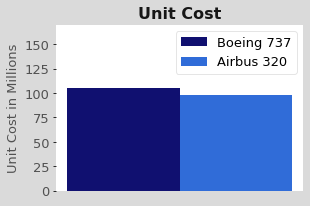

In [75]:
fig = plt.figure(figsize=(10, 8), facecolor='#dadada', dpi = 1200)

plt.subplot(321)
# Kind 
sns.barplot(x="Time", y='Value', hue='Model', data=comparison_df_melt)
# setting x and y axis 
plt.xticks(fontsize=13, color= '#161616', alpha=0.7)
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Total Aircrafts", fontsize=13, color= '#161616', alpha=0.7)
plt.xlabel('')

plt.legend(fontsize=13, fancybox=True, framealpha=0.5)

plt.title('Boeing 737 v Airbus 320', fontsize=16, fontweight='bold', color= '#161616')
# To remove the spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

fig.savefig('737 v 320 comparison.jpg',bbox_inches='tight', dpi=300, facecolor = '#dadada')
plt.show()

fig = plt.figure(figsize=(8, 8), facecolor='#dadada')
plt.subplot(322)

# Kind 
sns.barplot(x='Unit_Cost', y='Value', hue=comparison_unit_cost_df_melt['Model'], data=comparison_unit_cost_df_melt, palette=flatui)

# setting x and y axis 
plt.xticks([])
plt.yticks(fontsize=13, color= '#161616', alpha=0.7)
plt.ylabel("Unit Cost in Millions", fontsize=13, color= '#161616', alpha=0.7)
plt.xlabel('')

# setting y axis limit
plt.ylim(0,170)

plt.legend(fontsize=13, fancybox=True, framealpha=0.5)
plt.title('Unit Cost', fontsize=16, fontweight='bold', color= 'imp')

# To remove the spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)


plt.tight_layout()

# Saving the fig
fig.savefig('737 v 320 unit cost.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')


plt.show()

reading my self extracted csv file. SOURCE: Boeing, Airbus 

In [72]:
self_df2 = pd.read_csv('737v320.csv')
self_df2.head()

Time  Boeing 737  Airbus 320
0  1988         165          16
1  1989         146          58
2  1990         174          58
3  1991         215         119
4  1992         218         111

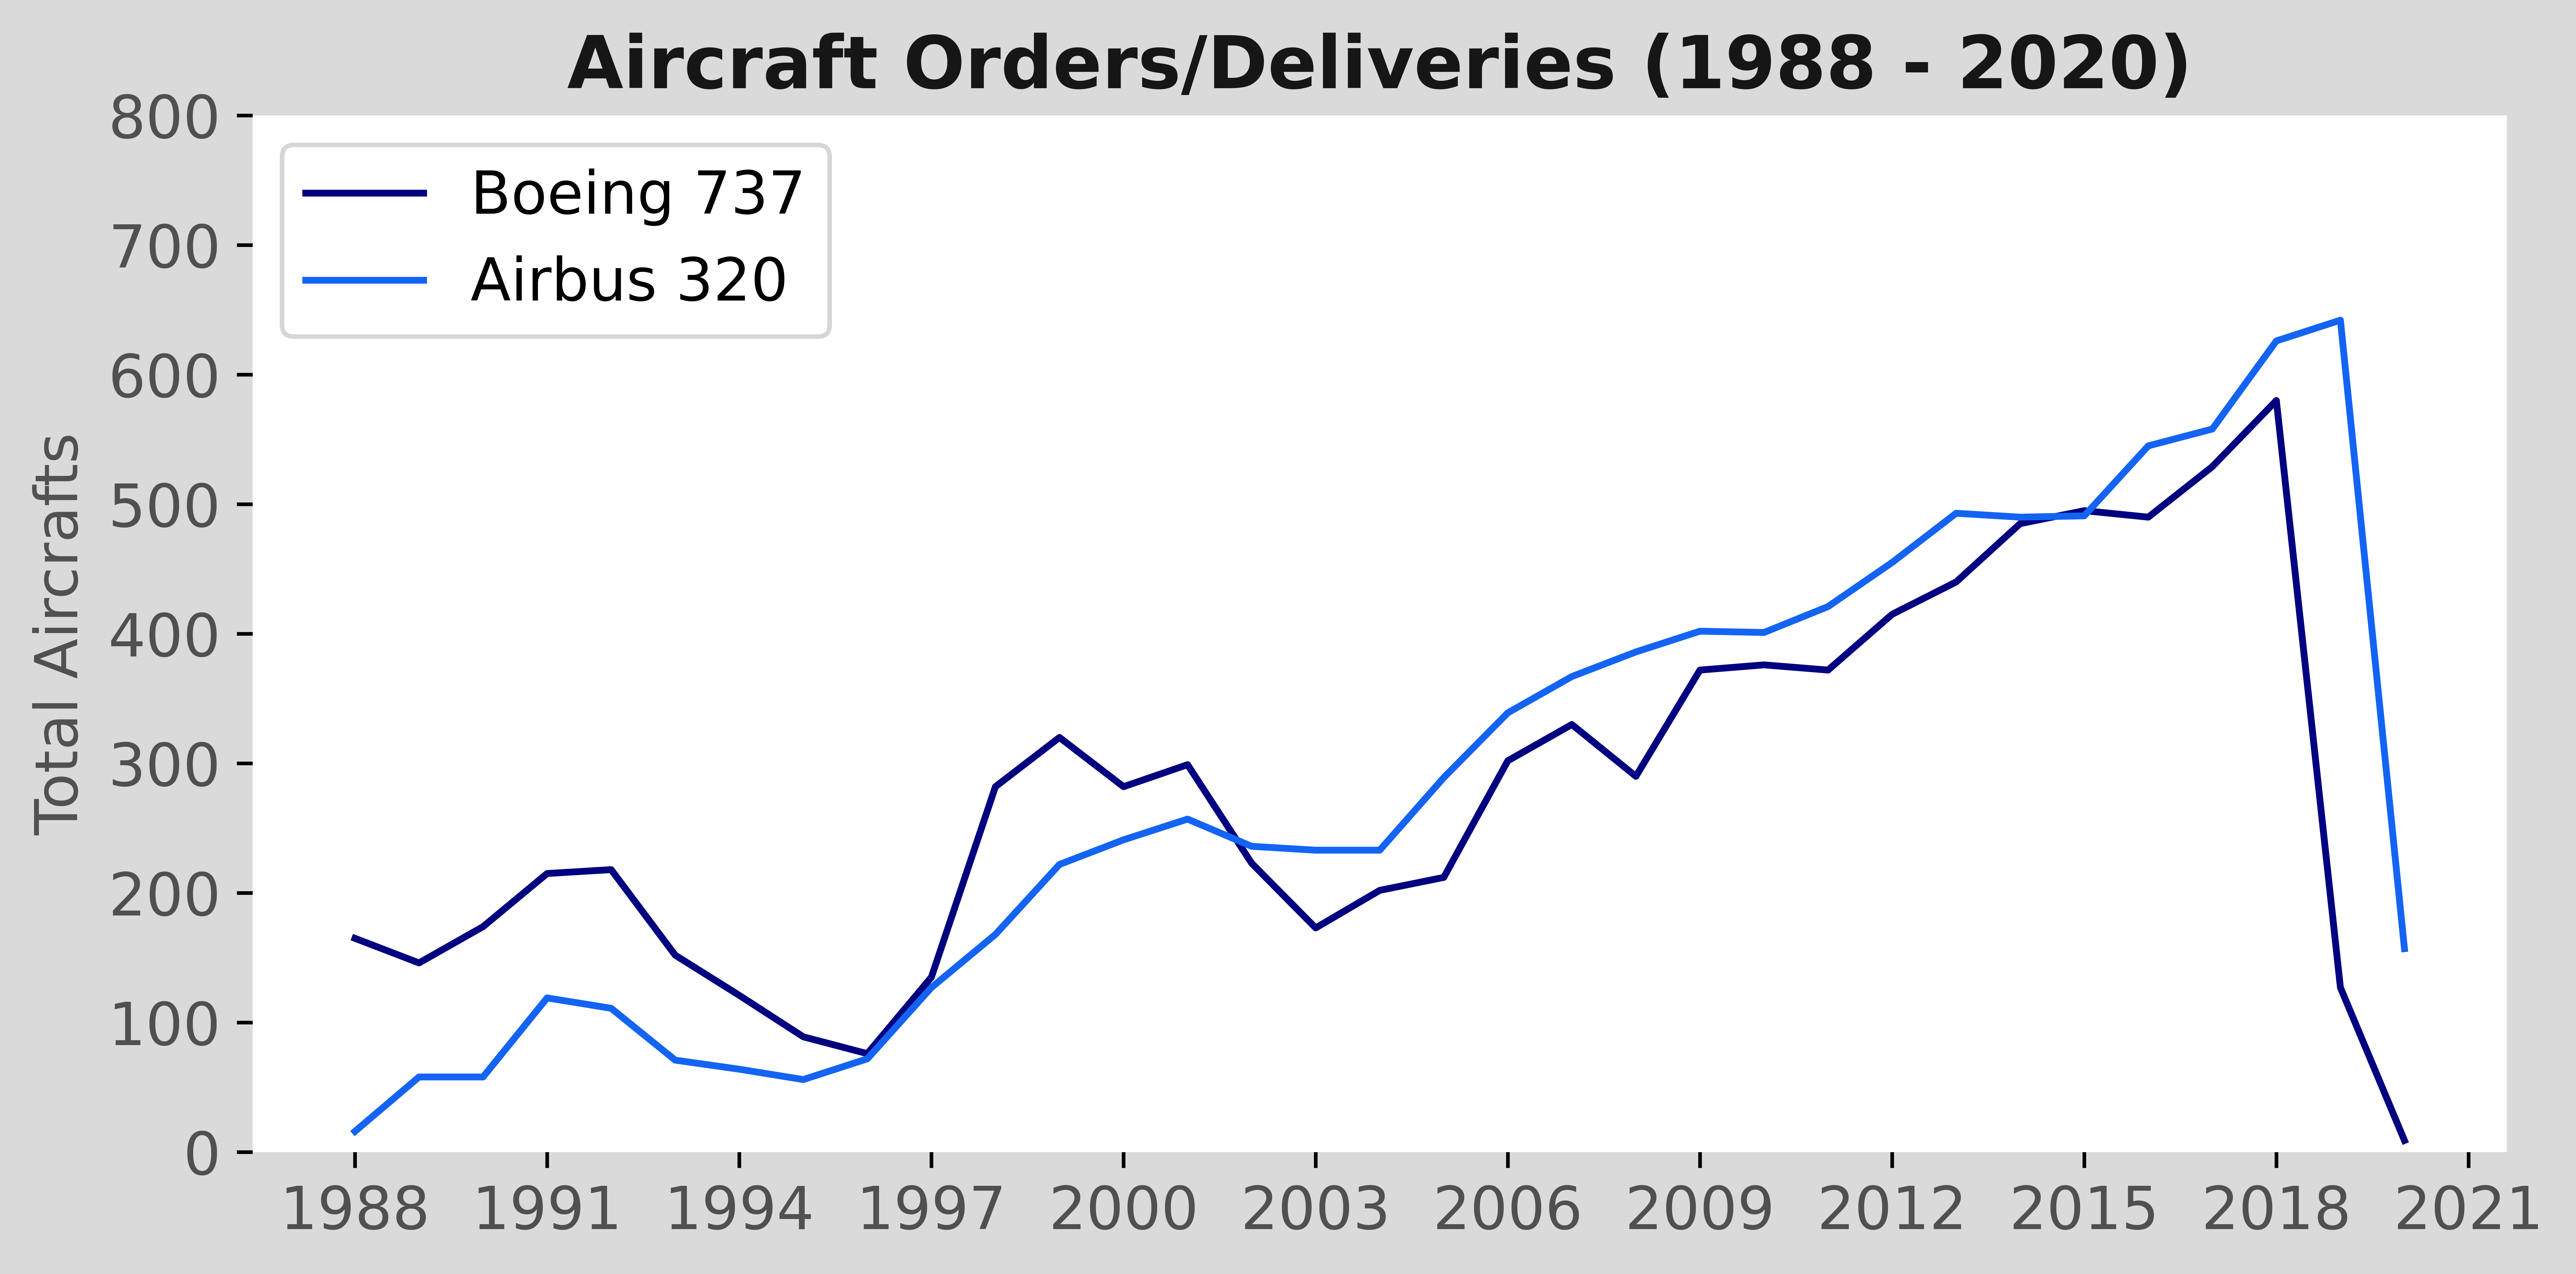

In [74]:
# creating time series plot for aircraft orders for the 737 and 320 
fig = plt.figure(figsize=(8, 4), facecolor= '#dadada', dpi=1200)

x_index = np.arange(len(self_df2['Time']))

plt.plot(x_index ,self_df2['Boeing 737'], color="#000080", label='Boeing 737')
plt.plot(x_index ,self_df2['Airbus 320'], color="#1464F4", label='Airbus 320')
# plt.plo\euler('Year', 'Airbus', data=self_df, color='tab:red')

# To set the ticks on the x axis and y axis
plt.xticks(ticks=np.arange(0,36)[::3], labels=[1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021], 
           fontsize = 13, color= '#161616', alpha=0.7)

plt.yticks(fontsize=13, alpha=.7, color= '#161616')

plt.ylabel('Total Aircrafts', fontsize=13, alpha=.7, color= '#161616')

# Setting the limit to y axis
plt.ylim(0, 800)

plt.title("Aircraft Orders/Deliveries (1988 - 2020)", fontsize=16, fontweight='bold', color= '#161616' )
# '#191970'
# plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left', fontsize=13)

# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.tight_layout() # Makes it better looking specially on laptops

# to save the fig
fig.savefig('timeseriesplot2.jpg',bbox_inches='tight', dpi=1200, facecolor = '#dadada')

plt.show()